In [1]:
#Først importeres de relevante packages til at downloade og åbne zipfilen
import zipfile
import urllib.request
import shutil
import pandas as pd

#Hjemmesiden og filnavnet specificeres
url = 'http://www.ices.dk/marine-data/Documents/CatchStats/OfficialNominalCatches.zip'
file_name = 'OfficialNominalCatches.zip'

#Vi "kalder" zip-filen fra url'en vha. urllib.request
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

In [2]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("ICESCatchDataset2006-2016.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Drop columns if all values are NaN
data.dropna(axis="columns", how="all", inplace=True)
data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,131.2,139.6,184.9,181.3,141.1
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,720.5,518.2,584.7,1039.5,907.0
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,179.3,195.1,194.3,142.4,144.4
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,1031.0,852.9,963.9,1363.2,1192.5
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Drop if countries is different from Denmark
data = data[data['Country']=='DK']

data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
3876,AAS,27.3,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# dictonary of all the fish in DK
rename_dict = {}
rename_dict['AAS'] = 'Y'
rename_dict['ABK'] = 'C'
rename_dict['AFT'] = 'G'
rename_dict['ANE'] = 'I'
rename_dict['ARG'] = 'X'
rename_dict['ARU'] = 'M'
rename_dict['BIB'] = 'M'
rename_dict['BLE'] = 'M'
rename_dict['BLF'] = 'M'
rename_dict['BLI'] = 'M'
rename_dict['BLL'] = 'Slethvar'
rename_dict['BON'] = 'M'
rename_dict['BOR'] = 'Havgalt'
rename_dict['BSH'] = 'M'
rename_dict['BSS'] = 'M'
rename_dict['CAP'] = 'Lodde'
rename_dict['CAT'] = 'Havkat'
rename_dict['CEP'] = 'M'
rename_dict['CLQ'] = 'M'
rename_dict['CMO'] = 'M'
rename_dict['COC'] = 'M'
rename_dict['COD'] = 'Torsk'
rename_dict['COE'] = 'M'
rename_dict['CPR'] = 'M'
rename_dict['CRA'] = 'M'
rename_dict['CRE'] = 'M'
rename_dict['CSH'] = 'Hesterejer'
rename_dict['CTL'] = 'M'
rename_dict['DAB'] = 'Ising'
rename_dict['DGS'] = 'M'
rename_dict['ELE'] = 'Blanke/gule ål'
rename_dict['ELP'] = 'M'
rename_dict['ELZ'] = 'M'
rename_dict['FAC'] = 'M'
rename_dict['FBM'] = 'M'
rename_dict['FBR'] = 'M'
rename_dict['FCC'] = 'M'
rename_dict['FCP'] = 'M'
rename_dict['FIN'] = 'M'
rename_dict['FLE'] = 'Skrubbe'
rename_dict['FPI'] = 'M'
rename_dict['FPP'] = 'M'
rename_dict['FRO'] = 'M'
rename_dict['FTE'] = 'M'
rename_dict['GAG'] = 'M'
rename_dict['GAR'] = 'M'
rename_dict['GAS'] = 'M'
rename_dict['GDG'] = 'M'
rename_dict['GFB'] = 'M'
rename_dict['GHL'] = 'M'
rename_dict['GPA'] = 'M'
rename_dict['GTA'] = 'M'
rename_dict['GUG'] = 'M'
rename_dict['GUX'] = 'M'
rename_dict['HAD'] = 'Kuller'
rename_dict['HAL'] = 'M'
rename_dict['HER'] = 'Sild'
rename_dict['HKE'] = 'Kulmule'
rename_dict['HOM'] = 'Hestemakrel'
rename_dict['INV'] = 'M'
rename_dict['JOD'] = 'M'
rename_dict['KCS'] = 'M'
rename_dict['KCT'] = 'M'
rename_dict['LBE'] = 'Alm. hummer'
rename_dict['LEM'] = 'Rødtunge'
rename_dict['LIN'] = 'Lange'
rename_dict['LUM'] = 'Kulso/stenbider'
rename_dict['MAC'] = 'Makrel'
rename_dict['MEG'] = 'M'
rename_dict['MON'] = 'Havtaske'
rename_dict['MUL'] = 'M'
rename_dict['MUS'] = 'Blåmusling'
rename_dict['MYG'] = 'M'
rename_dict['MZZ'] = 'M'
rename_dict['NEP'] = 'Dybvandhummer'
rename_dict['NOP'] = 'M'
rename_dict['OOA'] = 'M'
rename_dict['OYF'] = 'Østers'
rename_dict['PER'] = 'M'
rename_dict['PIL'] = 'M'
rename_dict['PLA'] = 'M'
rename_dict['PLE'] = 'Rødspætte'
rename_dict['PLN'] = 'M'
rename_dict['POA'] = 'M'
rename_dict['POC'] = 'M'
rename_dict['POK'] = 'Mørksej'
rename_dict['POL'] = 'Lyssej'
rename_dict['POR'] = 'M'
rename_dict['PRA'] = 'Dybvandsrejer'
rename_dict['RBO'] = 'M'
rename_dict['REB'] = 'M'
rename_dict['REG'] = 'M'
rename_dict['RJC'] = 'M'
rename_dict['RJH'] = 'M'
rename_dict['RJM'] = 'M'
rename_dict['RJN'] = 'M'
rename_dict['RNG'] = 'M'
rename_dict['SAL'] = 'Laks'
rename_dict['SAN'] = 'Tobis'
rename_dict['SCE'] = 'M'
rename_dict['SCL'] = 'M'
rename_dict['SCR'] = 'M'
rename_dict['SCX'] = 'M'
rename_dict['SKA'] = 'M'
rename_dict['SKB'] = 'M'
rename_dict['SME'] = 'M'
rename_dict['SOL'] = 'Tunge'
rename_dict['SPR'] = 'Brisling'
rename_dict['SSI'] = 'M'
rename_dict['STF'] = 'M'
rename_dict['STH'] = 'M'
rename_dict['SWO'] = 'M'
rename_dict['SYC'] = 'M'
rename_dict['TRR'] = 'M'
rename_dict['TRS'] = 'Havørred'
rename_dict['TSD'] = 'M'
rename_dict['TUR'] = 'Pighvar'
rename_dict['ULO'] = 'M'
rename_dict['URS'] = 'M'
rename_dict['USB'] = 'M'
rename_dict['USK'] = 'M'
rename_dict['VSP'] = 'M'
rename_dict['WEG'] = 'M'
rename_dict['WHB'] = 'Blåhvilling'
rename_dict['WHE'] = 'M'
rename_dict['WHG'] = 'Hvilling'
rename_dict['WHX'] = 'M'
rename_dict['WIT'] = 'Skærising'

# data.rename(rows = rename_dict, inplace=True)

#Renaming the species names
data.loc[data['Species'] == 'BLL', ['Species']] = 'Slethvar'
data.loc[data['Species'] == 'BOR', ['Species']] = 'Havgalt'
data.loc[data['Species'] == 'CAP', ['Species']] = 'Lodde'
data.loc[data['Species'] == 'CAT', ['Species']] = 'Havkat'
data.loc[data['Species'] == 'COD', ['Species']] = 'Torsk'
data.loc[data['Species'] == 'CSH', ['Species']] = 'Hestereje'
data.loc[data['Species'] == 'DAB', ['Species']] = 'Ising'
data.loc[data['Species'] == 'ELE', ['Species']] = 'Blanke/gule ål'
data.loc[data['Species'] == 'FLE', ['Species']] = 'Skrubbe'
data.loc[data['Species'] == 'HAD', ['Species']] = 'Kuller'
data.loc[data['Species'] == 'HER', ['Species']] = 'Sild'
data.loc[data['Species'] == 'HKE', ['Species']] = 'Kulmule'
data.loc[data['Species'] == 'HOM', ['Species']] = 'Hestemakrel'
data.loc[data['Species'] == 'LBE', ['Species']] = 'Alm. hummer'
data.loc[data['Species'] == 'LEM', ['Species']] = 'Rødtunge'
data.loc[data['Species'] == 'LIN', ['Species']] = 'Lange'
data.loc[data['Species'] == 'LUM', ['Species']] = 'Kulso/stenbider'
data.loc[data['Species'] == 'MAC', ['Species']] = 'Makrel'
data.loc[data['Species'] == 'MON', ['Species']] = 'Havtaske'
data.loc[data['Species'] == 'MUS', ['Species']] = 'Blåmusling'
data.loc[data['Species'] == 'NEP', ['Species']] = 'Dybvandhummer'
data.loc[data['Species'] == 'OYF', ['Species']] = 'Østers'
data.loc[data['Species'] == 'PLE', ['Species']] = 'Rødspætte'
data.loc[data['Species'] == 'POK', ['Species']] = 'Mørksej'
data.loc[data['Species'] == 'POL', ['Species']] = 'Lyssej'
data.loc[data['Species'] == 'PRA', ['Species']] = 'Dybvandsrejer'
data.loc[data['Species'] == 'SAL', ['Species']] = 'Laks'
data.loc[data['Species'] == 'SAN', ['Species']] = 'Tobis'
data.loc[data['Species'] == 'SOL', ['Species']] = 'Tunge'
data.loc[data['Species'] == 'SPR', ['Species']] = 'Brisling'
data.loc[data['Species'] == 'TRS', ['Species']] = 'Havørred'
data.loc[data['Species'] == 'TUR', ['Species']] = 'Pighvar'
data.loc[data['Species'] == 'WHB', ['Species']] = 'Blåhvilling'
data.loc[data['Species'] == 'WHG', ['Species']] = 'Hvilling'
data.loc[data['Species'] == 'WIT', ['Species']] = 'Skærising'



data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
3876,AAS,27.3,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data = data.loc[(data['Area'] == '27.4') | (data['Area'] == '27.3.c.22') | (data['Area'] == '27.3.a.20') |(data['Area'] == '27.3.a.21') | (data['Area'] == '27.3.b') | (data['Area'] == '27.3.d') | (data['Area'] == '27') ]  

data['SpeciesCount']  = data['Species'].apply(len)

data = data.loc[data['SpeciesCount'] != 3]

data.drop(['SpeciesCount'], axis=1)


,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
3972,Slethvar,27.4,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00
3975,Slethvar,27,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02
3981,Slethvar,27.3.c.22,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00
3982,Slethvar,27.3.d,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02
4005,Havgalt,27,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00
4091,Lodde,27,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00
4109,Havkat,27.4,TLW,DK,432.89,281.80,256.36,148.38,190.89,138.46,203.50,151.00,104.00,80.01,77.01
4111,Havkat,27,TLW,DK,466.33,310.99,285.37,170.24,219.26,158.67,235.42,180.13,140.03,127.04,111.05
4122,Havkat,27.3.c.22,TLW,DK,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01
4123,Havkat,27.3.d,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.03


In [11]:
data.loc[data['Area'] == '27.4', ['Area']] = 'North Sea'
data.loc[data['Area'] == '27.3.c.22', ['Area']] = 'Belt Sea'
data.loc[data['Area'] == '27.3', ['Area']] = 'Skagerak, Kattegat, Sound Belt & Baltic Sea'
data.loc[data['Area'] == '27.3.a', ['Area']] = 'Skagerrak & Kattegat'
data.loc[data['Area'] == '27.3.b', ['Area']] = 'Sound'
data.loc[data['Area'] == '27.3.d', ['Area']] = 'Baltic Sea'
data.loc[data['Area'] == '27', ['Area']] = 'All seas'

data.head(10)

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,SpeciesCount
3972,Slethvar,North Sea,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00,8
3975,Slethvar,All seas,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8
3981,Slethvar,Belt Sea,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00,8
3982,Slethvar,Baltic Sea,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02,8
4005,Havgalt,All seas,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7
4091,Lodde,All seas,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00,5
4109,Havkat,North Sea,TLW,DK,432.89,281.80,256.36,148.38,190.89,138.46,203.50,151.00,104.00,80.01,77.01,6
4111,Havkat,All seas,TLW,DK,466.33,310.99,285.37,170.24,219.26,158.67,235.42,180.13,140.03,127.04,111.05,6
4122,Havkat,Belt Sea,TLW,DK,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,6
4123,Havkat,Baltic Sea,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.03,6


In [103]:
#Adding column with type of fish (industry og consumption) based on Species column
pd.set_option('display.max_rows', 1000)
def set_type(fish):
    if fish["Species"] == "Tobis":
        return "Industry"
    elif fish["Species"] == "Brisling":
        return "Industry"
    elif fish["Species"] == "Blåhvilling":
        return "Industry"
    elif fish["Species"] == "Hestemakrel":
        return "Industry"
    elif fish["Species"] == "Skolæst":
        return "Industry"
    elif fish["Species"] == "Havgalt":
        return "Industry"
    elif fish["Species"] == "Sperling":
        return "Industry"
    else:
        return "Consumption"
data = data.assign(Type=data.apply(set_type, axis=1))

data.head(10)

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,SpeciesCount,Type
3972,Slethvar,North Sea,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00,8,Consumption
3975,Slethvar,All seas,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8,Consumption
3981,Slethvar,Belt Sea,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00,8,Consumption
3982,Slethvar,Baltic Sea,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02,8,Consumption
4005,Havgalt,All seas,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7,Industry
4091,Lodde,All seas,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00,5,Consumption
4109,Havkat,North Sea,TLW,DK,432.89,281.80,256.36,148.38,190.89,138.46,203.50,151.00,104.00,80.01,77.01,6,Consumption
4111,Havkat,All seas,TLW,DK,466.33,310.99,285.37,170.24,219.26,158.67,235.42,180.13,140.03,127.04,111.05,6,Consumption
4122,Havkat,Belt Sea,TLW,DK,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,6,Consumption
4123,Havkat,Baltic Sea,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.03,6,Consumption


In [318]:
# include only the area All seas
all_seas = data.copy()
all_seas = all_seas.loc[all_seas['Area'] == 'All seas',:]
all_seas.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,SpeciesCount,Type
3975,Slethvar,All seas,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8,Consumption
4005,Havgalt,All seas,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7,Industry
4091,Lodde,All seas,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00,5,Consumption
4111,Havkat,All seas,TLW,DK,466.33,310.99,285.37,170.24,219.26,158.67,235.42,180.13,140.03,127.04,111.05,6,Consumption
4184,Torsk,All seas,TLW,DK,23284.36,26229.53,22254.03,20425.75,28554.81,26849.40,26701.41,23694.70,23545.00,24494.00,29585.00,5,Consumption


In [326]:
import matplotlib.pyplot as plt
import pandas as pd

# Sorted by largest amount catched in 2016
all_seas = all_seas.sort_values(by = ['2016'], ascending=False)
all_seas.head(50)

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,SpeciesCount,Type
6086,Brisling,All seas,TLW,DK,219217.26,302821.17,190354.34,96386.17,111705.76,163220.03,187020.50,195174.10,126692.01,140892.01,183794.00,8,Industry
4931,Sild,All seas,TLW,DK,160669.28,134810.63,135579.73,141028.37,125117.07,85934.05,77445.40,92049.30,105446.00,120659.00,139660.00,4,Consumption
5338,Blåmusling,All seas,TLW,DK,42909.32,45299.79,41363.21,37490.74,39425.85,34442.78,27871.80,37447.20,35082.00,57335.00,54809.00,10,Consumption
5204,Makrel,All seas,TLW,DK,41251.32,46906.58,41917.67,33259.53,36232.77,34828.99,41055.03,23229.02,26731.02,24889.00,24234.02,6,Consumption
6341,Blåhvilling,All seas,TLW,DK,39134.45,45098.92,35011.22,2026.29,279.41,137.06,141.71,246.80,17998.00,52654.00,58184.00,11,Industry
5905,Tobis,All seas,TLW,DK,29319.71,169249.84,158991.10,212080.72,54002.24,282484.86,292515.80,305560.50,255645.00,167270.00,256763.00,5,Industry
5536,Rødspætte,All seas,TLW,DK,26936.01,24254.30,20850.89,21892.74,21365.85,20826.15,18095.30,16055.41,17580.01,16780.02,21184.00,9,Consumption
4184,Torsk,All seas,TLW,DK,23284.36,26229.53,22254.03,20425.75,28554.81,26849.40,26701.41,23694.70,23545.00,24494.00,29585.00,5,Consumption
5012,Hestemakrel,All seas,TLW,DK,6891.62,5355.29,6467.41,7857.39,5392.11,6191.62,5902.61,6014.50,5277.01,7813.01,8808.00,11,Industry
6397,Hvilling,All seas,TLW,DK,5351.61,3253.01,393.95,327.23,264.21,327.69,511.62,326.70,341.00,576.02,763.02,8,Consumption


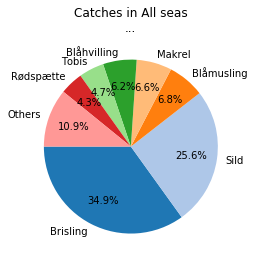

In [328]:
# After top 10, the rest is named Other
#all_seas.loc[all_seas['2016'] < 5000.00, ['Species']] = "Other"

# top 10
top10 = all_seas[:7].copy()

top10.head()

# others
others = pd.DataFrame(data = {
    'Species' : ['Others'],
    '2016' : [all_seas['2016'][7:].sum()]
})

# combining top 10 and others
full = pd.concat([top10, others], sort=False)

# plot
amount_2016 = full['2016']
species_data = full['Species']

colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78",
          "#2ca02c", "#98df8a", "#d62728", "#ff9896",
         "#9467bd", "#c5b0d5", "#7f7f7f"]

plt.pie(amount_2016, labels=species_data, explode=None, colors=colors,
autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=False, startangle=180)

plt.title("Catches in All seas\n"+"...")

plt.show()

# Pie chart of fish caught in all seas

In [323]:
# Copy of data that only includes the area All seas
all_seas = data.copy()
all_seas = all_seas.loc[all_seas['Area'] == 'All seas',:]
all_seas.head()


# Sorted by largest amount caught in 2016
all_seas = all_seas.sort_values(by = ['y2016'], ascending=False)


# Top 7 is extracted 
top7 = all_seas[:7].copy()


# The remaining species are renamed 'Others' and aggregated
others = pd.DataFrame(data = {
    'Species' : ['Others'],
    'y2016' : [all_seas['y2016'][7:].sum()]
})

# Combining Top 7 and Others
full = pd.concat([top7, others], sort=False)

# Plot showing the share of fish caught in 2016 by species
amount_2016 = full['y2016']
species_data = full['Species']

colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78",
          "#2ca02c", "#98df8a", "#d62728", "#ff9896",
         "#9467bd", "#c5b0d5", "#7f7f7f"]

plt.pie(amount_2016, labels=species_data, explode=None, colors=colors,
autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=False, startangle=180)

plt.title("Catches in All seas\n"+"Top 7 catches by volume, 2016")

plt.show()

KeyError: 'y2016'